In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_excel('csvs/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- pclass: 객실 등급
- survived: 생존 유무
- sex: 성별
- age: 나이
- sibsp: 형제 혹은 부부의 수
- parch: 부모, 혹은 자녀의 수
- fare: 지불한 운임
- boat: 탈출한 보트가 있다면 boat 번호

In [3]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


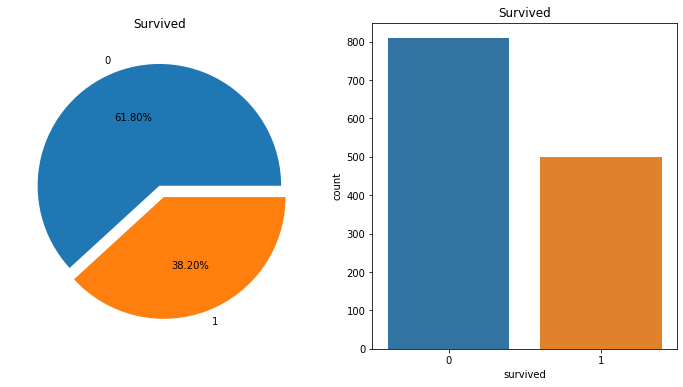

In [4]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))

raw_data['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                             autopct='%1.2f%%',
                                             ax=ax[0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<AxesSubplot:>

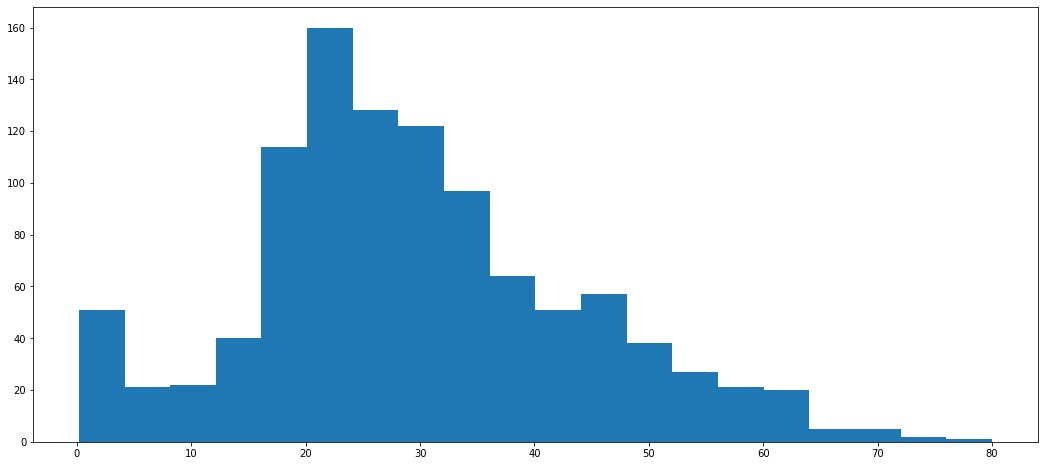

In [5]:
raw_data['age'].hist(bins=20, figsize=(18, 8), grid=False)

In [6]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


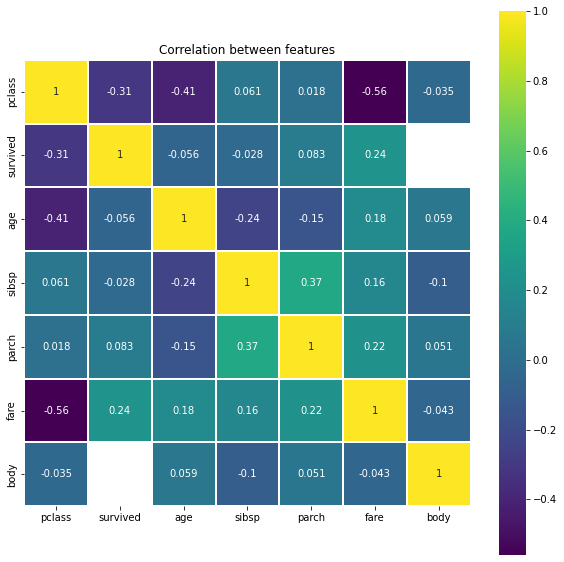

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(),
            linewidths=0.01,
            square=True,
            annot=True,
            cmap=plt.cm.viridis,
            linecolor="white")
plt.title('Correlation between features')
plt.show()

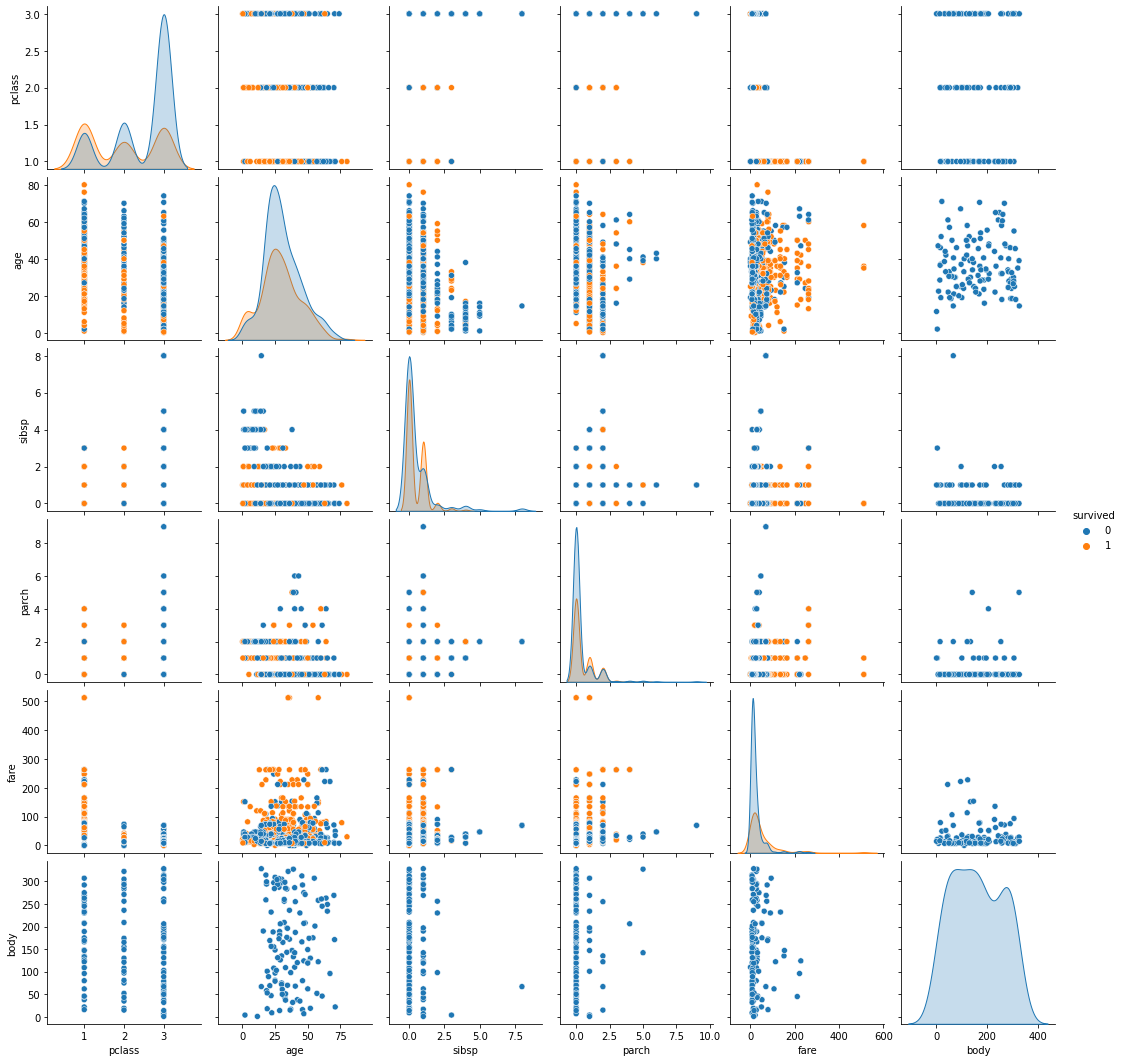

In [8]:
sns.pairplot(raw_data, hue='survived')
plt.show()

<AxesSubplot:xlabel='fare', ylabel='Count'>

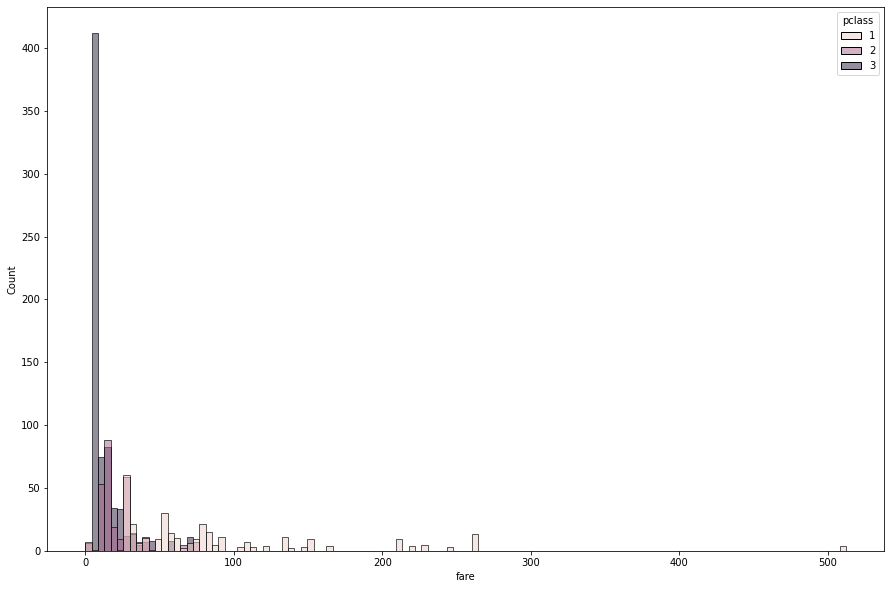

In [9]:
plt.figure(figsize=(15, 10))
sns.histplot(raw_data, x='fare', hue='pclass')

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


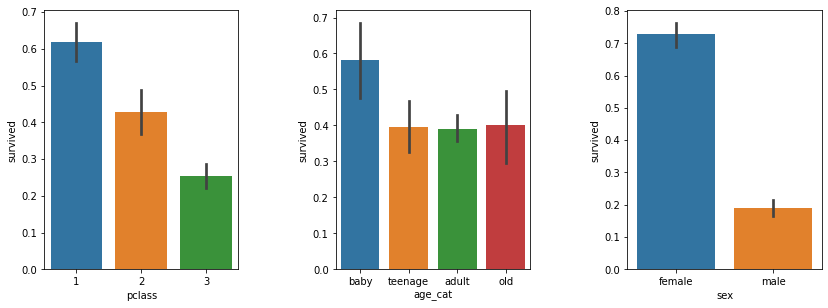

In [10]:
raw_data['age_cat'] = pd.cut(raw_data['age'],
                             bins=[0, 10, 20, 50, 100],
                             include_lowest=True,
                             labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12, 4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.subplots_adjust(top=1,
                    bottom=0.1,
                    left=0.10,
                    right=1,
                    hspace=0.5,
                    wspace=0.5)
plt.show()

In [11]:
raw_data['label_sex'] = raw_data['sex'].apply(lambda x: 0
                                              if x == 'female' else 1)

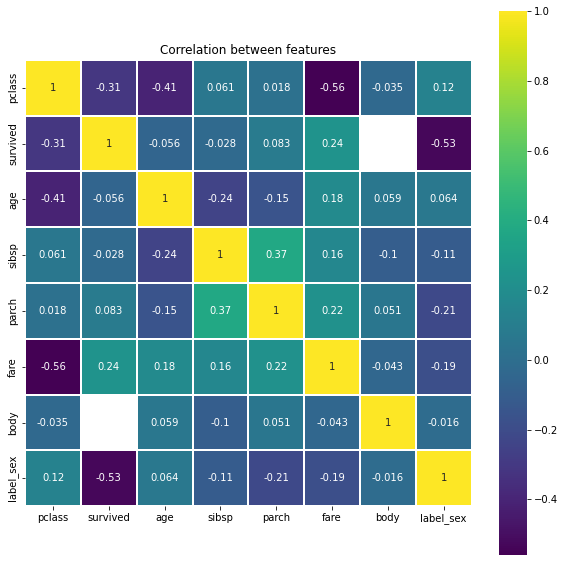

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(),
            linewidths=0.01,
            square=True,
            annot=True,
            cmap=plt.cm.viridis,
            linecolor="white")
plt.title('Correlation between features')
plt.show()

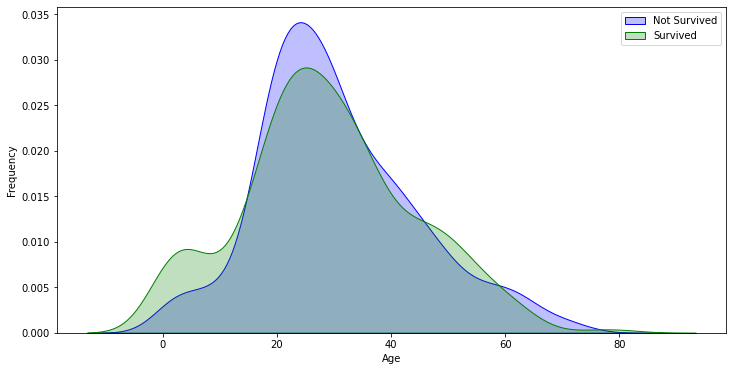

In [13]:
f, ax = plt.subplots(figsize=(12, 6))
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 0)
                                & (raw_data["age"].notnull())],
                ax=ax,
                color="Blue",
                shade=True)
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 1)
                                & (raw_data["age"].notnull())],
                ax=g,
                color="Green",
                shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived", "Survived"])

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


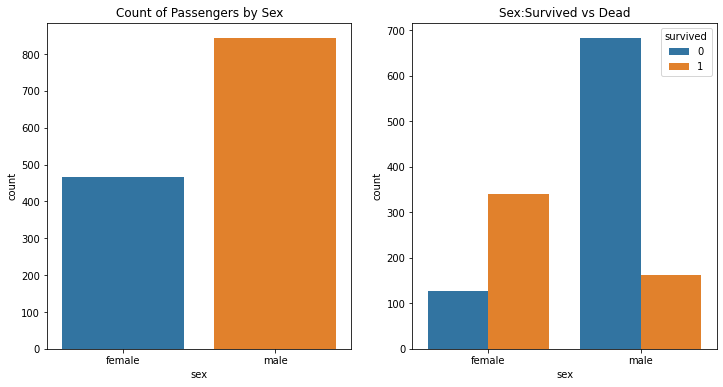

In [14]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot('sex', data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex', hue='survived', data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


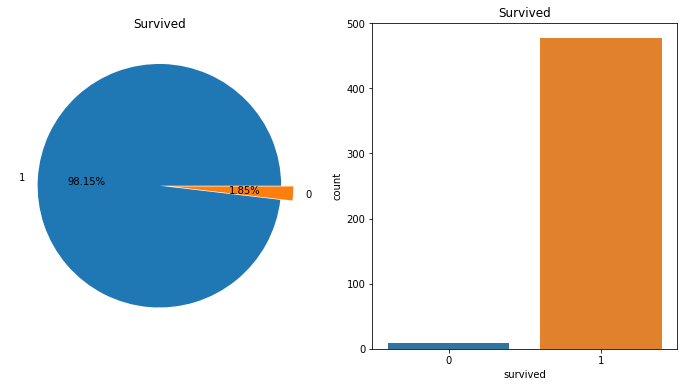

In [15]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
f, ax = plt.subplots(1, 2, figsize=(12, 6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                                   autopct='%1.2f%%',
                                                   ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [16]:
raw_data['is_boat'] = raw_data['boat'].apply(lambda x: 0
                                             if pd.isnull(x) else 1)
raw_data['is_boat']

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: is_boat, Length: 1309, dtype: int64

In [17]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   float64 
 2   name       1309 non-null   object  
 3   sex        1309 non-null   float64 
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  label_sex  1309 non-null   int64   
 16  is_boat    1309 non-null   int64   
dtypes: category(1), float64(8), int64(2), object(6)
memory usage: 165.2+ KB


In [18]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

In [19]:
x_data = raw_data.values[:, [0, 3, 4, 5, 6, 8, 16]].astype(float)
y_data = raw_data.values[:, [1]].astype(float)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.1,
                                                    random_state=7)

In [20]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense

np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

tensorflow version :  2.9.1
keras version :  2.9.0


In [21]:
model = Sequential()
model.add(Dense(255, input_shape=(7, ), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 255)               2040      
                                                                 
 dense_1 (Dense)             (None, 1)                 256       
                                                                 
Total params: 2,296
Trainable params: 2,296
Non-trainable params: 0
_________________________________________________________________


In [22]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
30/30 [==============================] - 0s 4ms/step - loss: 0.2145 - accuracy: 0.7032 - val_loss: 0.1699 - val_accuracy: 0.8000
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.8096 - val_loss: 0.1358 - val_accuracy: 0.8476
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.8713 - val_loss: 0.1086 - val_accuracy: 0.8762
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.8798 - val_loss: 0.1212 - val_accuracy: 0.8667
Epoch 5/50
30/30 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9128 - val_loss: 0.0734 - val_accuracy: 0.9238
Epoch 6/50
30/30 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9500 - val_loss: 0.0582 - val_accuracy: 0.9429
Epoch 7/50
30/30 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9330 - val_loss: 0.0519 - val_accuracy: 0.9619
Epoch 8/50
30/30 [==

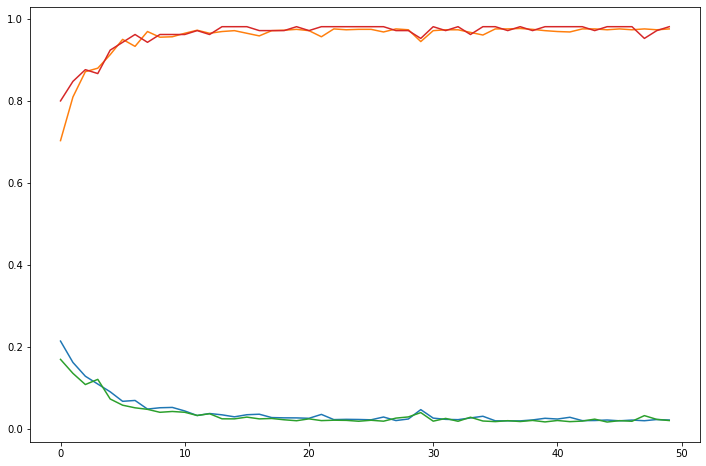

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [24]:
dicaprio = np.array([3., 0., 19., 0., 0., 5., 0.]).reshape(1, 7)
winslet = np.array([1., 1., 17., 1., 2., 100., 1.]).reshape(1, 7)

In [25]:
model.predict(dicaprio)

1/1 [==============================] - 0s 47ms/step


array([[0.01854762]], dtype=float32)

In [26]:
model.predict(winslet)

1/1 [==============================] - 0s 15ms/step


array([[0.99923223]], dtype=float32)

In [27]:
model.save('titanic.h5')

In [31]:
from tensorflow import keras

test_model = tf.keras.models.load_model('titanic.h5')
test_model.predict(dicaprio)

1/1 [==============================] - 0s 25ms/step


array([[0.01854762]], dtype=float32)